In [50]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_airlines", header=None,
                 names=["Airline ID", "Name", "Alias", "IATA", "ICAO", "Callsign", "Country", "Active" ])

In [52]:
df.set_index('Airline ID', inplace=True)

In [53]:
df.head(3)

Name Alias IATA ICAO Callsign        Country Active
Airline ID                                                               
1           Private flight  \N    -    NaN  NaN      NaN            Y    
2           135 Airways     \N    NaN  GNL  GENERAL  United States  N    
3           1Time Airline   \N    1T   RNX  NEXTIME  South Africa   Y

In [54]:
df.tail(3)

Name Alias IATA ICAO     Callsign   Country Active
Airline ID                                                                    
19831       Fly Europa            NaN   ER   RWW  NaN          Spain     Y    
19834       FlyPortugal           NaN   PO   FPT  FlyPortugal  Portugal  Y    
19845       FTI Fluggesellschaft  NaN   NaN  FTI  NaN          Germany   N

## **Basic Stastics**

In [55]:
df.describe() #some quick stastics

Name Alias  IATA  ICAO Callsign        Country Active
count   6048               5614  1461  5961  5305     6033           6048 
unique  5959               138   1090  5766  5215     276            3    
top     National Airlines  \N    1I    \N     Inc.    United States  N    
freq    5                  5477  7     165   20       1080           4886

## **Cleaning the Data**

In [56]:
print(df.isnull().sum())

Name        0   
Alias       434 
IATA        4587
ICAO        87  
Callsign    743 
Country     15  
Active      0   
dtype: int64


In [57]:
print(df.notnull().sum())

Name        6048
Alias       5614
IATA        1461
ICAO        5961
Callsign    5305
Country     6033
Active      6048
dtype: int64


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6048 entries, 1 to 19845
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6048 non-null   object
 1   Alias     5614 non-null   object
 2   IATA      1461 non-null   object
 3   ICAO      5961 non-null   object
 4   Callsign  5305 non-null   object
 5   Country   6033 non-null   object
 6   Active    6048 non-null   object
dtypes: object(7)
memory usage: 378.0+ KB


In [59]:
# prompt: Using dataframe df: I want to convert columns: Country - Name - Alias  to type: String

#df[['Country', 'Name', 'Alias']] = df[['Country', 'Name', 'Alias']].astype('string')
#df[['IATA', 'ICAO', 'Callsign', 'Active']] = df[['IATA', 'ICAO', 'Callsign', 'Active']].astype('object')

In [60]:
#fill missing values with zeros - for now - simple cleaning
new_df = df.fillna(0)
new_df

Name  \
Airline ID                                                                                      
 1          Private flight                                                                      
 2          135 Airways                                                                         
 3          1Time Airline                                                                       
 4          2 Sqn No 1 Elementary Flying Training School                                        
 5          213 Flight Unit                                                                     
 6          223 Flight Unit State Airline                                                       
 7          224th Flight Unit                                                                   
 8          247 Jet Ltd                                                                         
 9          3D Aviation                                                                         
 10         40-Mile Air                                                                         
 11         4D Air                                                                              
 12         611897 Alberta Limited                                                              
 13         Ansett Australia                                                                    
 14         Abacus International                                                                
 15         Abelag Aviation                                                                     
 16         Army Air Corps                                                                      
 17         Aero Aviation Centre Ltd.                                                           
 18         Aero Servicios Ejecutivos Internacionales                                           
 19         Aero Biniza                                                                         
 20         Aero Albatros                                                                       
 21         Aigle Azur                                                                          
 22         Aloha Airlines                                                                      
 23         Alaska Island Air                                                                   
 24         American Airlines                                                                   
 25         Aviation Management Corporation                                                     
 26         Atlantis Airlines (USA)                                                             
 27         Aerovista Airlines                                                                  
 28         Asiana Airlines                                                                     
 29         Askari Aviation                                                                     
 30         Australia Asia Airlines                                                             
 31         Astro Air International                                                             
 32         Afriqiyah Airways                                                                   
 33         Afrinat International Airlines                                                      
 34         Afric'air Express                                                                   
 35         Allegiant Air                                                                       
 36         Angus Aviation                                                                      
 37         Artem-Avia                                                                          
 38         African Business and Transportations                                                
 39         Aban Air                                                                            
 40         Aerial Oy                                                                           
 41         Aba

In [61]:
print(new_df.isnull().sum())

Name        0
Alias       0
IATA        0
ICAO        0
Callsign    0
Country     0
Active      0
dtype: int64


In [62]:
# Get the unique countries
unique_countries = new_df['Country'].unique()

# List the unique countries
print("Unique Countries:")
for country in unique_countries:
    print(country)

Unique Countries:
0
United States
South Africa
United Kingdom
Russia
Thailand
Canada
Australia
Singapore
Belgium
Mexico
Spain
France
United Arab Emirates
Republic of Korea
Pakistan
Libya
Gambia
Ivory Coast
Ukraine
Democratic Republic of the Congo
Iran
Finland
Brazil
Colombia
AEROCENTER
Ghana
Kenya
Liberia
Togo
Somali Republic
Morocco
Canadian Territories
Dominican Republic
Japan
Albania
Nigeria
Germany
Slovenia
Czech Republic
Benin
AEROCESAR
Greece
Chile
Tanzania
Bolivia
Italy
Sweden
Argentina
Sierra Leone
Indonesia
Senegal
Afghanistan
Uganda
Bosnia and Herzegovina
Gabon
Angola
Uzbekistan
Namibia
Turkey
Vietnam
Zambia
Venezuela
Egypt
Ireland
Switzerland
Serbia
Peru
Slovakia
Denmark
Azerbaijan
AIRPORT HELICOPTER
Hong Kong
Croatia
Hungary
Estonia
Swaziland
India
Reunion
Iceland
Israel
Austria
Jamaica
Malta
Portugal
Cyprus
Kazakhstan
Kyrgyzstan
Turkmenistan
Kiribati
Cambodia
Netherlands Antilles
Sao Tome and Principe
ALNACIONAL
Lithuania
Maldives
Malawi
Moldova
Montenegro
Macao
Seychelles

#### Cleaning the "Country" Column again

In [63]:
new_df["Country"].isnull().sum() #1- handle missing data (if available)

0

In [64]:
# 2A- Map unconventional values to their correct country names
country_mapping = {
    'AEROCENTER': 'Switzerland',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    'Congo (Brazzaville)': 'Republic of the Congo'
}

new_df['Country'] = new_df['Country'].replace(country_mapping)

# 2B- Drop non-country rows
values_to_remove = ['Canadian Territories', 'AIRPORT HELICOPTER', '\\N', 'S', 'AIR-MAUR', 'American Samoa']
new_df = new_df[~new_df['Country'].isin(values_to_remove)]

In [65]:
#print again the list of unique countries
unique_countries = new_df['Country'].unique()

# List the unique countries
print("Unique Countries:")
for country in unique_countries:
    print(country)


Unique Countries:
0
United States
South Africa
United Kingdom
Russia
Thailand
Canada
Australia
Singapore
Belgium
Mexico
Spain
France
United Arab Emirates
Republic of Korea
Pakistan
Libya
Gambia
Ivory Coast
Ukraine
Democratic Republic of the Congo
Iran
Finland
Brazil
Colombia
Switzerland
Ghana
Kenya
Liberia
Togo
Somali Republic
Morocco
Dominican Republic
Japan
Albania
Nigeria
Germany
Slovenia
Czech Republic
Benin
AEROCESAR
Greece
Chile
Tanzania
Bolivia
Italy
Sweden
Argentina
Sierra Leone
Indonesia
Senegal
Afghanistan
Uganda
Bosnia and Herzegovina
Gabon
Angola
Uzbekistan
Namibia
Turkey
Vietnam
Zambia
Venezuela
Egypt
Ireland
Serbia
Peru
Slovakia
Denmark
Azerbaijan
Hong Kong
Croatia
Hungary
Estonia
Swaziland
India
Reunion
Iceland
Israel
Austria
Jamaica
Malta
Portugal
Cyprus
Kazakhstan
Kyrgyzstan
Turkmenistan
Kiribati
Cambodia
Netherlands Antilles
Sao Tome and Principe
ALNACIONAL
Lithuania
Maldives
Malawi
Moldova
Montenegro
Macao
Seychelles
Bulgaria
Papua New Guinea
Latvia
ANTARES
AVINOR
Ne

## Data Visualization

In [66]:
# Group by country and count the number of airlines in each country
country_counts = new_df.groupby('Country').size().reset_index(name='Number of Airlines')

# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(country_counts)

                                   Country  Number of Airlines
0    0                                      15                
1     Boonville Stage Line                  1                 
2     S.A.                                  1                 
3    ACOM                                   1                 
4    ACTIVE AERO                            1                 
5    AEROCESAR                              1                 
6    AEROPERLAS                             1                 
7    AEROPUMA                               1                 
8    AEROSOL                                1                 
9    AEROSUN                                1                 
10   AEROVARADERO                           1                 
11   AEROWEE                                1                 
12   AIR CLASS                              1                 
13   AIR FREIGHTER                          1                 
14   AIR PRINT                              1          

<ipython-input-66-98fcd8683775>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [67]:
# Mapping dictionary for country name corrections
country_mapping = {
    'United States': 'United States of America'
    # Add more mappings as needed
}

# Replace country names in the dataset using the mapping dictionary
new_df['Country'] = new_df['Country'].replace(country_mapping)
country_counts = new_df.groupby('Country').size().reset_index(name='Number of Airlines')


<ipython-input-67-13ccffde4298>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Country'] = new_df['Country'].replace(country_mapping)


<ipython-input-69-b5dde3d7462a>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


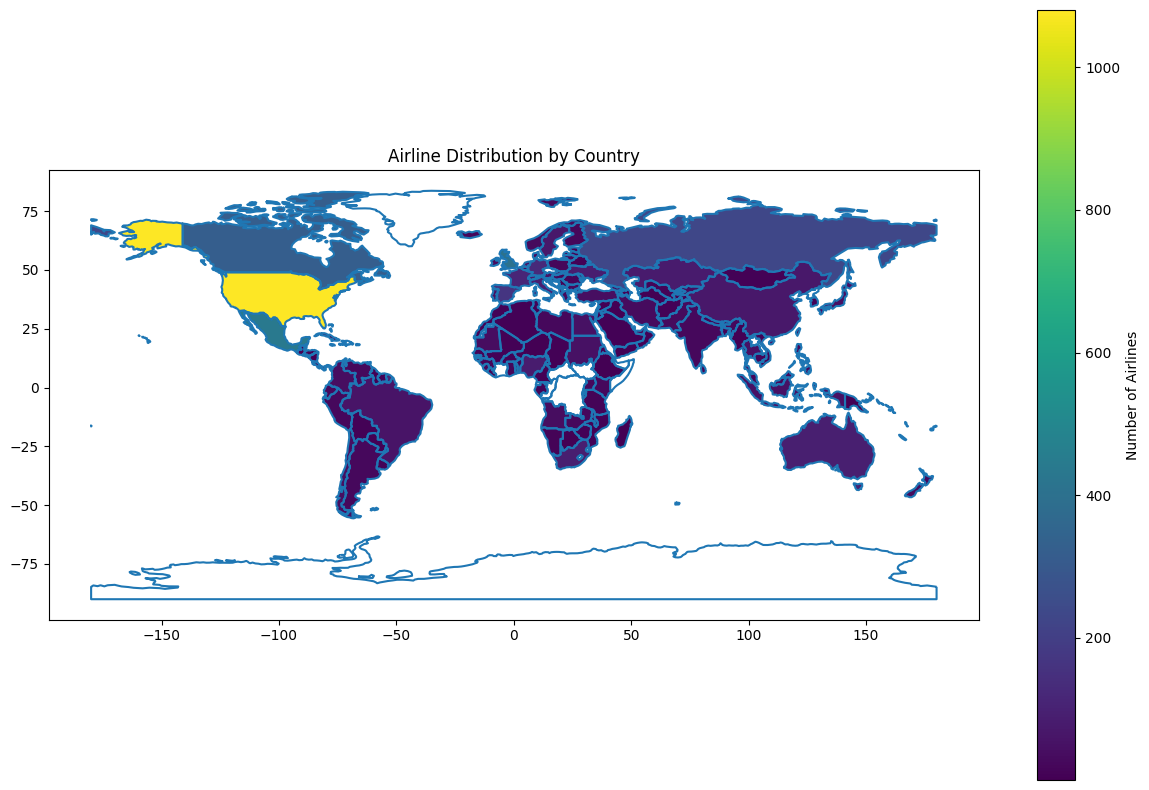

In [69]:
# Load the world map GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map GeoDataFrame with the corrected dataset
merged = world.merge(country_counts, how='left', left_on='name', right_on='Country')


# 3- Plot the world map with markers
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)

#4- plot the choropleth (colored) map
merged.plot(column='Number of Airlines', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Number of Airlines"})


plt.title('Airline Distribution by Country')
plt.show()